**소스 원본 출처** (나의 첫 머신러닝/딥러닝)

https://github.com/wikibook/machine-learning

In [264]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import math

from matplotlib.colors import ListedColormap
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# 문제 정의

농구 선수의 경기 기록을 바탕으로, 그 선수의 포지션을 예측하라

# 데이터 수집

In [2]:
# 데이터를 수집합니다
df = pd.read_csv("./basketball_stat.csv")

In [3]:
# 수집된 데이터 샘플을 확인합니다
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [4]:
# 현재 가지고 있는 데이터에서, 포지션의 갯수를 확인한다
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

# 데이터 다듬기

In [5]:
# 분별력이 없는 특징(feature)을 데이터에서 제거합니다 (['TRB', '3P']만 남김)
df.drop(['2P', 'AST', 'STL', 'BLK'], axis=1, inplace = True)

# 데이터 나누기 (학습 데이터, 테스트 데이터)

In [6]:
# sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있다
from sklearn.model_selection import train_test_split

# train, test가 random_state(random seed)에 따라 각자 다를 수 있으나, 
#고정된 random_state 하에서 생성하면 같은 결과를 얻게 됨
random_state = 2019

# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다
train, test = train_test_split(df, test_size=0.2, random_state=random_state)

In [7]:
# 학습 데이터의 갯수를 확인합니다, 80개의 데이터가 있습니다.
train.shape[0]

80

In [8]:
# 테스트 데이터의 갯수를 확인합니다. 20개의 데이터가 있습니다.
test.shape[0]

20

In [9]:
train.head()

,Player,Pos,3P,TRB
20,Jamal Crawford,SG,1.4,1.6
4,Will Barton,SG,1.5,4.3
77,Willie Reed,C,0.0,4.7
97,Dion Waiters,SG,1.8,3.3
0,Alex Abrines,SG,1.4,1.3


In [10]:
test.head()

,Player,Pos,3P,TRB
13,Avery Bradley,SG,2.0,6.1
45,Buddy Hield,SG,1.8,3.3
1,Steven Adams,C,0.0,7.7
73,Victor Oladipo,SG,1.9,4.3
6,Bradley Beal,SG,2.9,3.1


In [11]:
# train(개발용 데이터)를 
# 학습용(train_train, 90%)과
# 검증용(train_val, 10%)로 추가 분리 <- random_state 추가!!!
train_train, train_val = train_test_split(train, test_size=0.1, 
                                          random_state=random_state)

**train(학습) 데이터 시각화** (위에서 한 내용 복습)

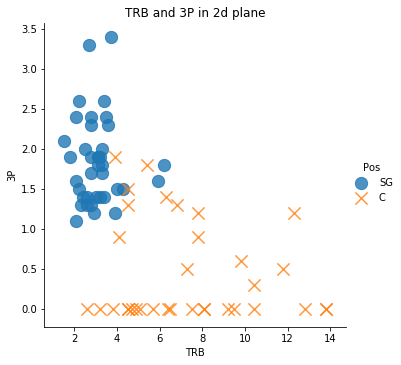

In [12]:
# data를 전체(df)에서 개발_학습용(train_train)으로 바꿔서 사용
sns.lmplot('TRB', '3P', data=train_train, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('TRB and 3P in 2d plane')
plt.show()

In [13]:
# select data features
x_train = train_train[['TRB', '3P']]
# select target value
y_train = train_train[['Pos']]

# select data feature to be used for prediction
x_val = train_val[['TRB', '3P']]

# select target value
y_val = train_val[['Pos']]

x_test = test[['TRB', '3P']]
y_test = test[['Pos']]

* 의사결정트리의 결과를 2차원 평면 형태로 시각화해주는 함수. 이 함수의 작동원리 이해보다 이 함수를 활용해 알고리즘별 학습 결과를 이해하는데 집중합시다.

In [14]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [315]:
clf.predict_stage?

Object `clf.predict_stage` not found.


In [320]:
def plot_decision_boundary(clf, X, y, xx=None, yy=None, levels=[0, 0.5, 1], pos=None, le=False, score_to_proba=None):
    
    XV = X.values
    if xx==None or yy==None:
        h = .01  # step size in the mesh
        x_min, x_max = XV[:, 0].min() - .1, XV[:, 0].max() + .1
        y_min, y_max = XV[:, 1].min() - .1, XV[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    #print(clf[0])
    if type(clf) == sklearn.tree.tree.DecisionTreeRegressor:
        Z = score_to_proba(clf.predict(np.c_[xx.ravel(), yy.ravel()]))[:,1]
    elif pos != None and type(clf) == sklearn.ensemble.GradientBoostingClassifier:
        Z = np.zeros(xx.shape[0]*xx.shape[1])
        for i in range(0,pos+1):
            Z += clf.learning_rate * clf.estimators_[i][0].predict(np.c_[xx.ravel(), yy.ravel()])
        Z = score_to_proba(Z)[:,1]
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8, levels=levels)
    
    plt.colorbar()
    
    if le!=None:
        # 파라미터 설정
        n_classes = len(le.classes_)
        plot_colors = "rbyw"
        plot_step = 0.002

        # 학습 데이터를 챠트에 표시
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(XV[idx, 0], 
                        XV[idx, 1], 
                        c=color, 
                        label=le.classes_[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=50)
            
    # 챠트 기호 설명
    plt.legend(loc='upper right', borderaxespad=0., fontsize=14)
    
    # x축의 이름과 폰트 크기 설정
    plt.xlabel(X.columns[0],fontsize=16)
    # y축의 이름과 폰트 크기 설정
    plt.ylabel(X.columns[1],fontsize=16)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
            
    #plt.show()

In [15]:
def display_decision_surface(clf, X, y, le):
    
    # 챠트의 범위가 모든 학습 데이터를 포함하도록 설정
    x_min = X[X.columns[0]].min() - 0.01
    x_max = X[X.columns[0]].max() + 0.01
    y_min = X[X.columns[1]].min() - 0.01
    y_max = X[X.columns[1]].max() + 0.01
    
    # 파라미터 설정
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.002

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # 학습 데이터를 챠트에 표시
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.iloc[idx][X.columns[0]], 
                    X.iloc[idx][X.columns[1]], 
                    c=color, 
                    label=le.classes_[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=100)

    # 챠트 제목
    plt.title("Decision surface of a decision tree",fontsize=16)
    # 챠트 기호 설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
    # x축의 이름과 폰트 크기 설정
    plt.xlabel(X.columns[0],fontsize=16)
    # y축의 이름과 폰트 크기 설정
    plt.ylabel(X.columns[1],fontsize=16)
    # 챠트 크기 설정
    plt.rcParams["figure.figsize"] = [8,8]
    # 챠트 폰트 크기 설정
    plt.rcParams["font.size"] = 14
    # x축 좌표상의 폰트 크기 설정
    plt.rcParams["xtick.labelsize"] = 14
    # y축 좌표상의 폰트 크기 설정
    plt.rcParams["ytick.labelsize"] = 14

    # 챠트 그리기
    plt.show()

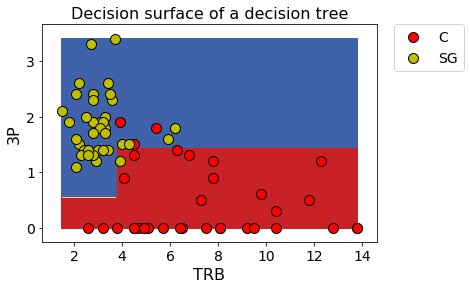

CPU times: user 1.58 s, sys: 327 ms, total: 1.9 s
Wall time: 1.91 s


In [335]:
%%time
# pyplot은 숫자로 표현된 레이블을 시각화할 수 있음
# LabelEncoder로 레이블을 숫자로 변경
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train.values.ravel())

# DecisionTreeClassifier 초기화
clf = tree.DecisionTreeClassifier(random_state=35, max_depth=2)
clf.fit(x_train, y_encoded)

display_decision_surface(clf, x_train, y_encoded, le)

# 의사결정트리 시각화
의사결정트리의 장점은 예측값이 어떤 식으로 판단되었는 지 이해가 무척 쉽다는 것입니다.  
다른 모델들에 비해, 큰 수학적인 지식이 없어도, 아래의 트리 그림을 보면, 어떻게 예측값이 도출되었는 지  
쉽게 알 수 있습니다.

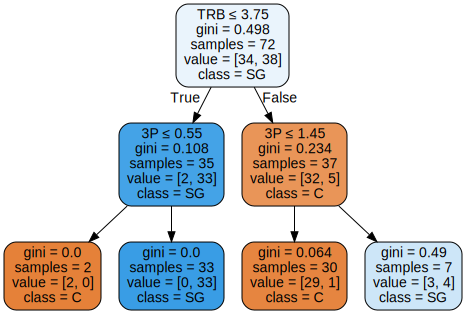

In [149]:
import graphviz

clf = tree.DecisionTreeClassifier(random_state=35, max_depth=2)
clf.fit(x_train, y_encoded)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
#graph.render("seoul")

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=[x_train.columns[0],x_train.columns[1]],  
                         class_names=le.classes_,  
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
display(graph)

**gini** : 불순도 척도. 0일 경우, 모든 샘플이 하나의 분류값을 갖으며, 0이 아닐 경우, 1에 가까울수록, 여러 분류값이 한 노드에 존재합니다.  
**samples** : 노드 안에 들어 있는 데이터의 갯수  
**value** : 분류값 별 데이터의 갯수   
**class** :  분류값

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=35,
            splitter='best')
accuracy(train/val/test) : 0.9444, 1.0000, 0.9000


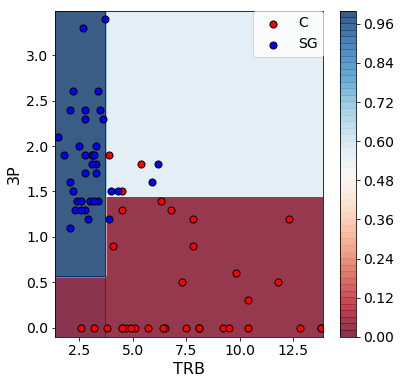

In [246]:
# import libraries
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(random_state=35, max_depth=2)
print(clf)
clf.fit(x_train, y_encoded)

# check accuracy
print(f"accuracy(train/val/test) : " +
      f"{accuracy_score(le.transform(y_train.values.ravel()), clf.predict(x_train)):.4f}, " +
      f"{accuracy_score(le.transform(y_val.values.ravel()), clf.predict(x_val)):.4f}, " +
      f"{accuracy_score(le.transform(y_test.values.ravel()), clf.predict(x_test)):.4f}")

# display_decision_surface(clf, x_train, y_encoded, le)
# plt.show()

plt.figure(figsize=(6,6))
plot_decision_boundary(clf, x_train, y_encoded, le=le, levels=[x * 0.02 for x in range(51)])
plt.show()

---
* Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [247]:
# clf.estimators_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
accuracy(train/val/test) : 0.9722, 1.0000, 0.9500


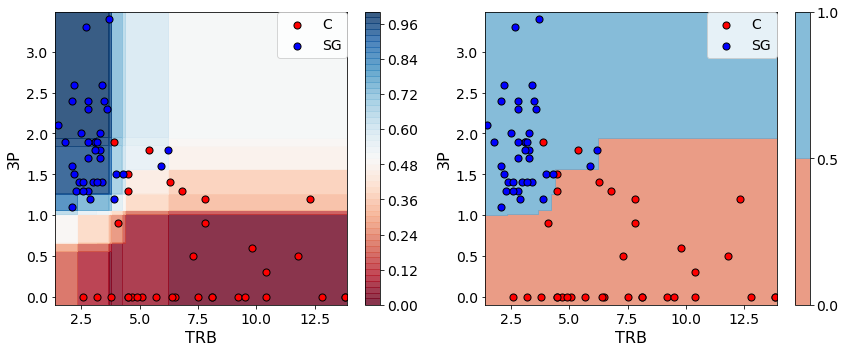

In [248]:
clf = RandomForestClassifier(random_state=0, max_depth=2, n_estimators=10) # 모델 생성(초기화)

print(clf)
clf.fit(x_train, y_encoded)

# check accuracy
print(f"accuracy(train/val/test) : " +
      f"{accuracy_score(le.transform(y_train.values.ravel()), clf.predict(x_train)):.4f}, " +
      f"{accuracy_score(le.transform(y_val.values.ravel()), clf.predict(x_val)):.4f}, " +
      f"{accuracy_score(le.transform(y_test.values.ravel()), clf.predict(x_test)):.4f}")

plt.subplots(1,2,figsize=(12, 5))
plt.subplot(121)
plot_decision_boundary(clf, x_train, y_encoded, le=le, levels=[x * 0.02 for x in range(51)])
plt.subplot(122)
plot_decision_boundary(clf, x_train, y_encoded, le=le, levels=[0, 0.5, 1])
plt.tight_layout()
plt.show()

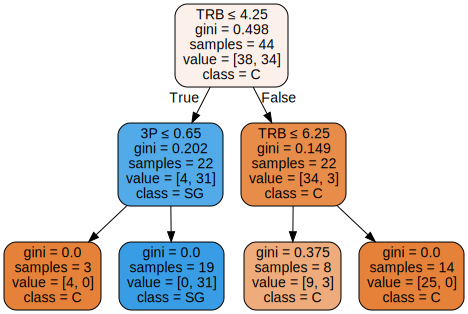

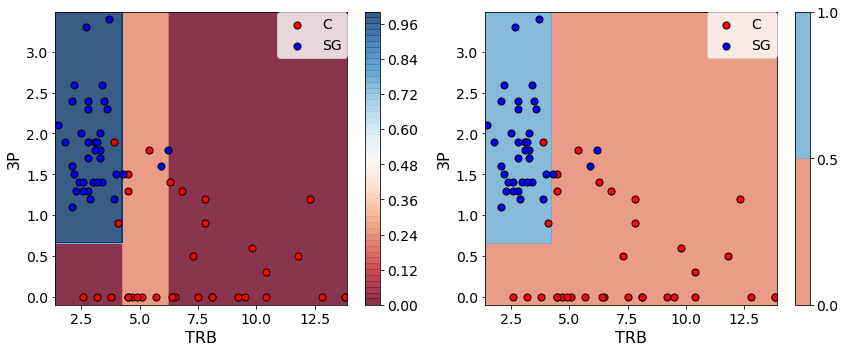

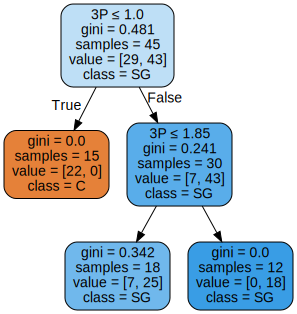

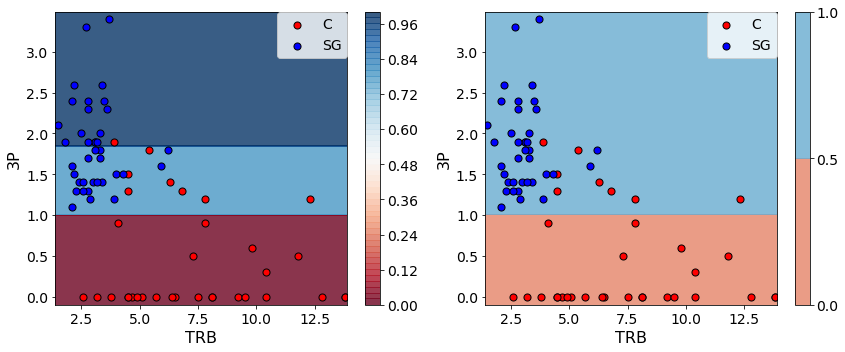

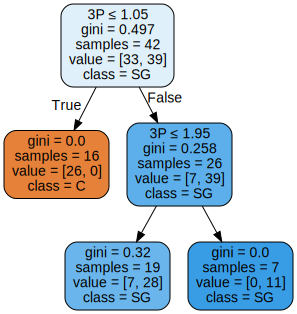

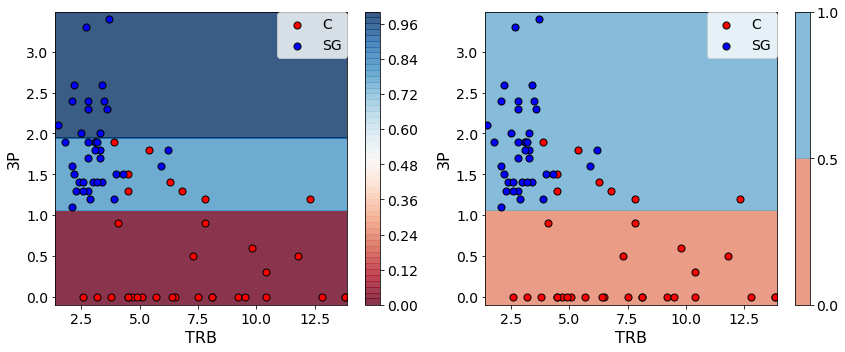

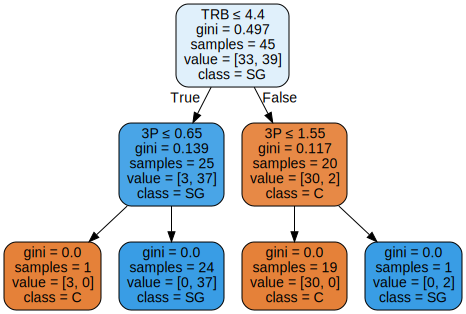

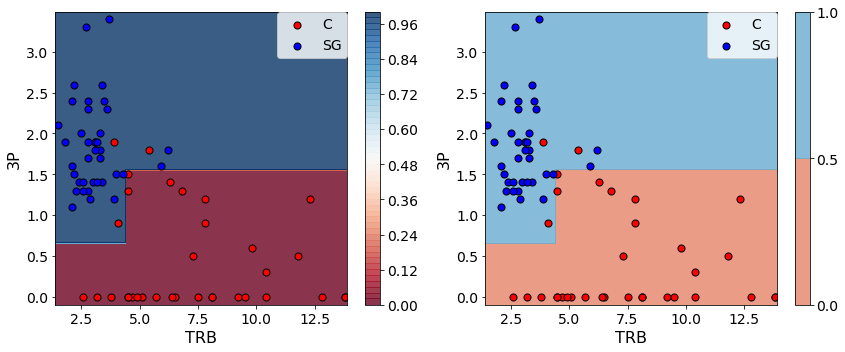

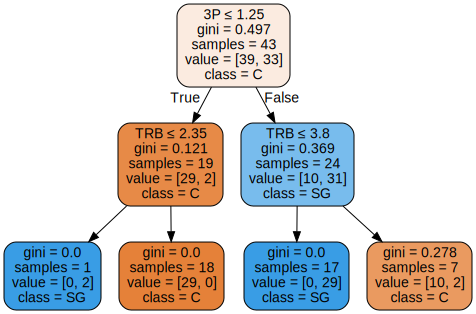

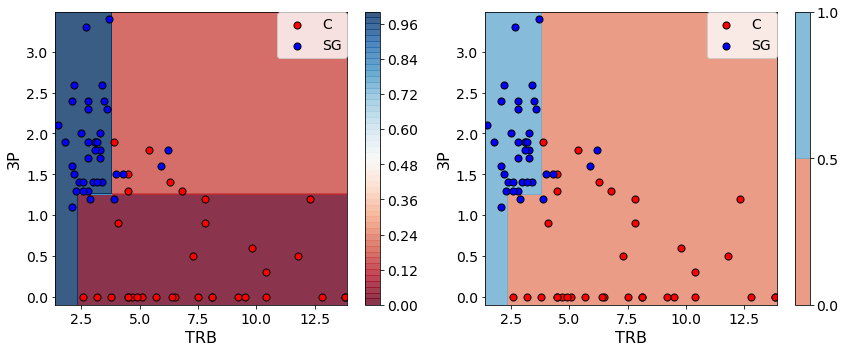

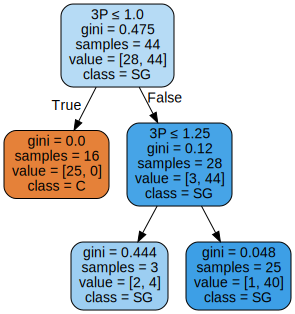

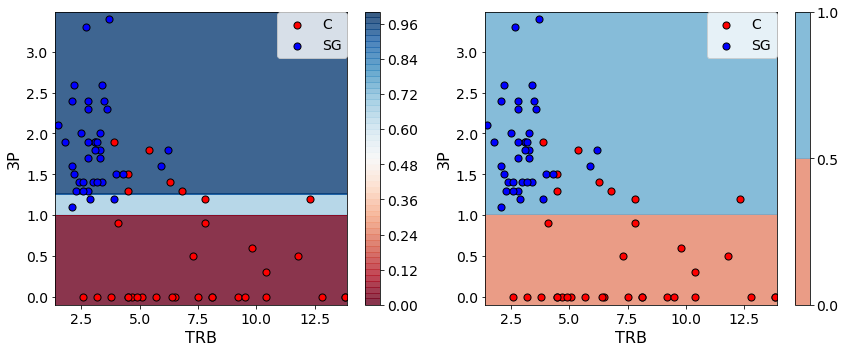

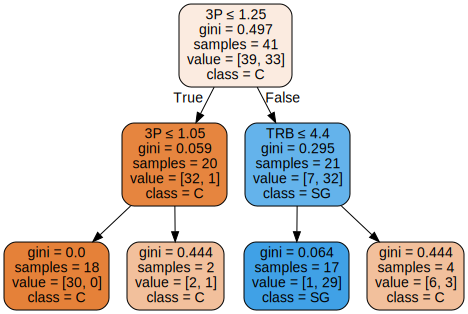

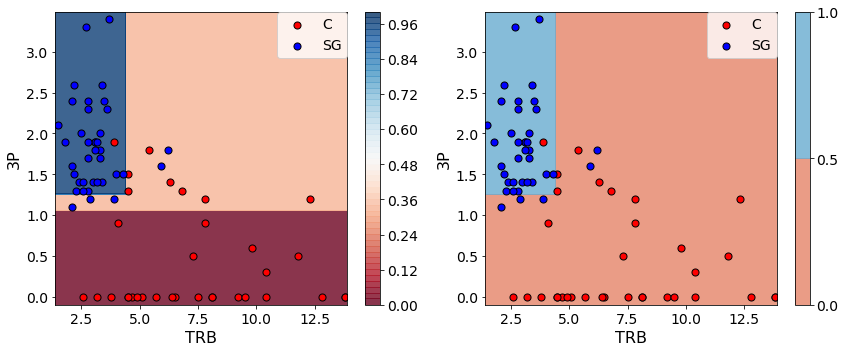

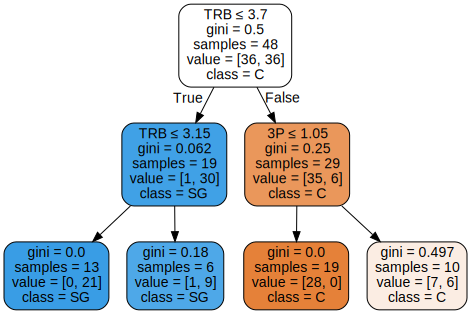

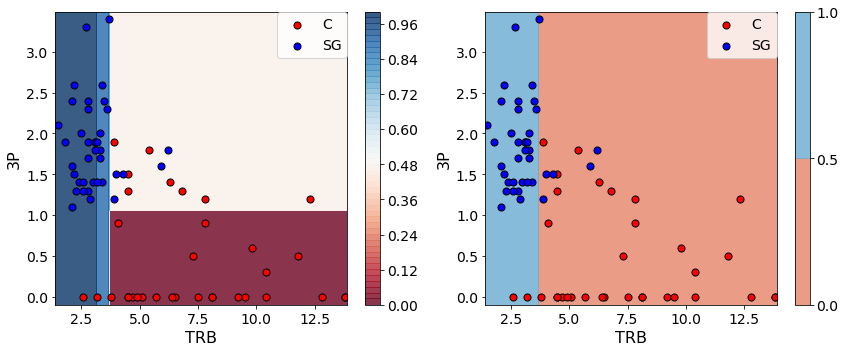

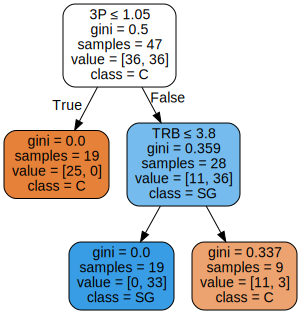

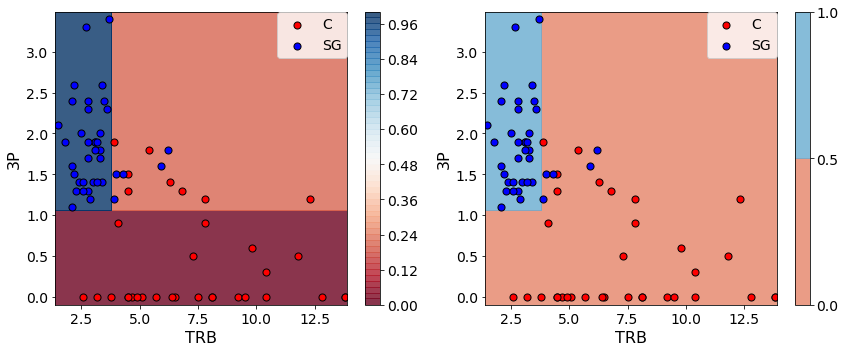

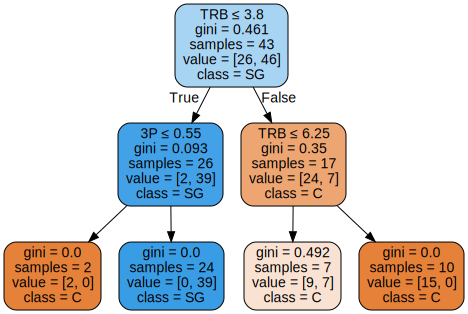

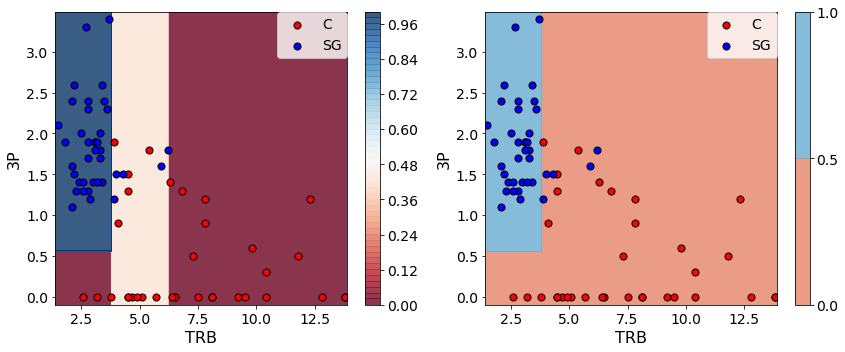

In [249]:
for n in range(clf.n_estimators):
    dot_data = tree.export_graphviz(clf.estimators_[n], out_file=None, 
                             feature_names=[x_train.columns[0],x_train.columns[1]],  
                             class_names=le.classes_,  
                             filled=True, rounded=True,
                             special_characters=True)  
    graph = graphviz.Source(dot_data)  
    display(graph)
    plt.subplots(1,2,figsize=(12, 5))
    plt.subplot(121)
    plot_decision_boundary(clf.estimators_[n], x_train, y_encoded, le=le, levels=[x * 0.02 for x in range(51)])
    plt.subplot(122)
    plot_decision_boundary(clf.estimators_[n], x_train, y_encoded, le=le, levels=[0, 0.5, 1])
    plt.tight_layout()
    plt.show()

---
* Gradient Boosting Machines

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
accuracy(train/val/test) : 1.0000, 1.0000, 0.8000


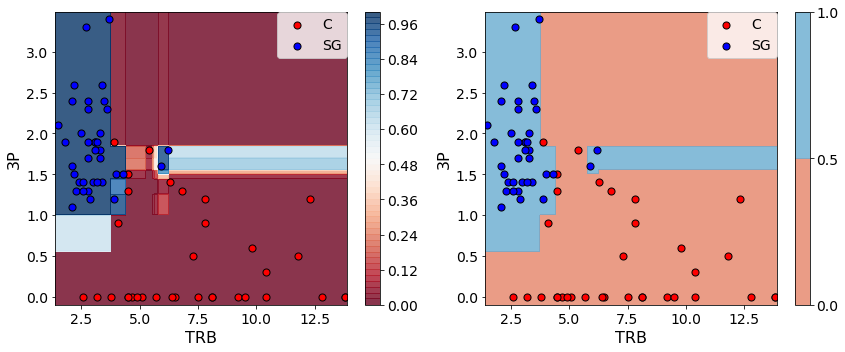

In [333]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0, max_depth=2, n_estimators=10, learning_rate=1.0) # 모델 생성(초기화)
print(clf)
clf.fit(x_train, y_encoded)

# check accuracy
print(f"accuracy(train/val/test) : " +
      f"{accuracy_score(le.transform(y_train.values.ravel()), clf.predict(x_train)):.4f}, " +
      f"{accuracy_score(le.transform(y_val.values.ravel()), clf.predict(x_val)):.4f}, " +
      f"{accuracy_score(le.transform(y_test.values.ravel()), clf.predict(x_test)):.4f}")

# display_decision_surface(clf, x_train, y_encoded, le)
# plt.show()

plt.subplots(1,2,figsize=(12, 5))
plt.subplot(121)
plot_decision_boundary(clf, x_train, y_encoded, le=le, levels=[x * 0.02 for x in range(51)])
plt.subplot(122)
plot_decision_boundary(clf, x_train, y_encoded, le=le, levels=[0,0.5,1])
plt.tight_layout()
plt.show()
# plt.figure(figsize=(6,6))
# plot_decision_boundary(clf, x_train, y_encoded, le=le, levels=[x * 0.02 for x in range(51)])
# plt.show()

In [278]:
# clf.estimators_[0:2,:]

# clf.loss_._score_to_proba??

# clf.estimators_[0][0]

In [279]:
# dot_data = tree.export_graphviz(clf.estimators_[0][0], out_file=None, 
#                          feature_names=[x_train.columns[0],x_train.columns[1]],  
#                          filled=True, rounded=True,  
#                          special_characters=True)  
# graph = graphviz.Source(dot_data)  
# display(graph)

In [280]:
# type(clf.estimators_[0][0]) == sklearn.tree.tree.DecisionTreeRegressor

# a = clf.estimators_[0][0]

# clf.loss_._score_to_proba(a.predict(x_train))

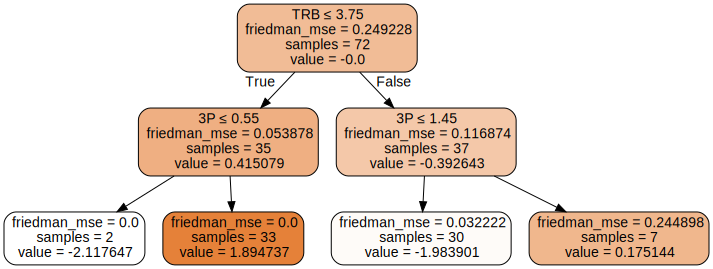

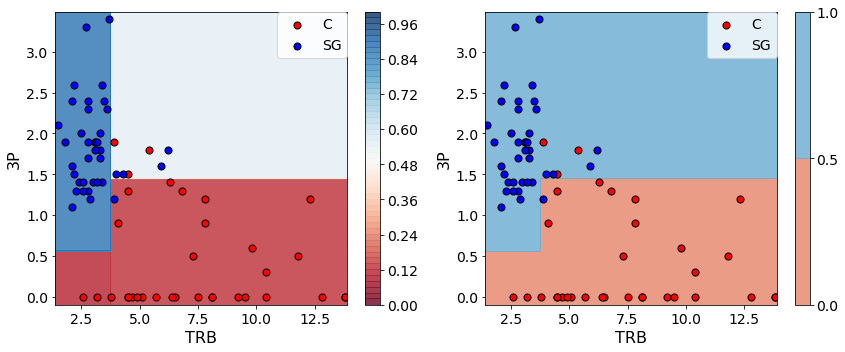

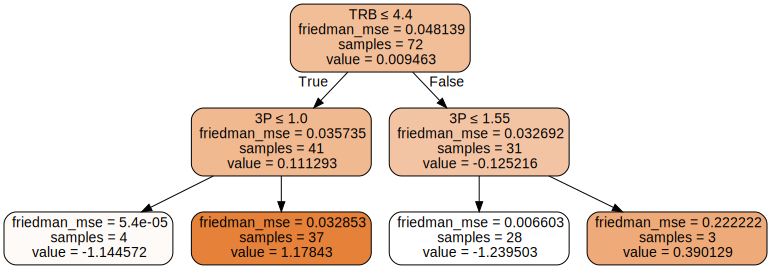

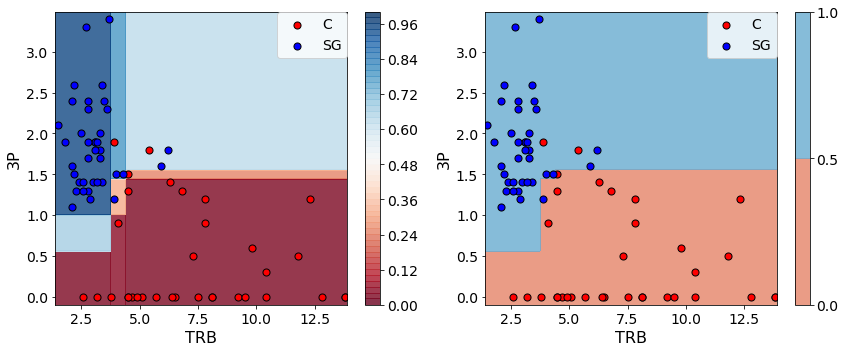

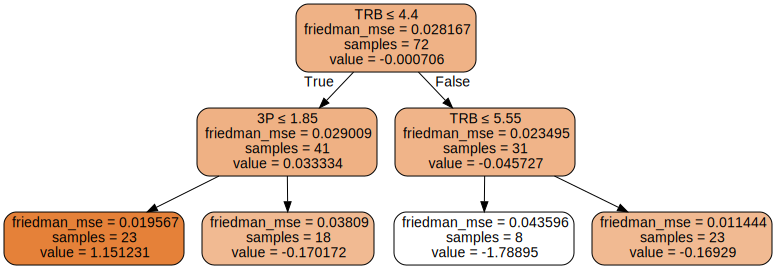

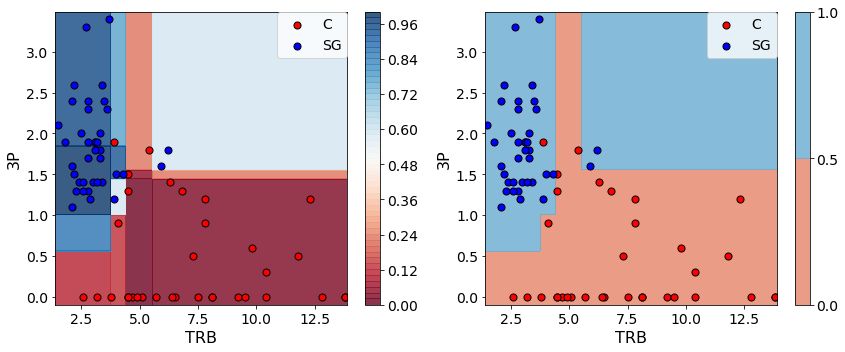

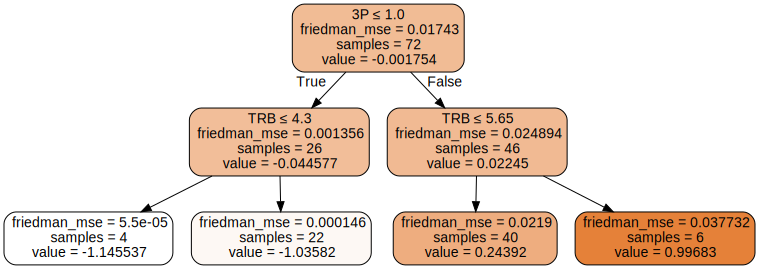

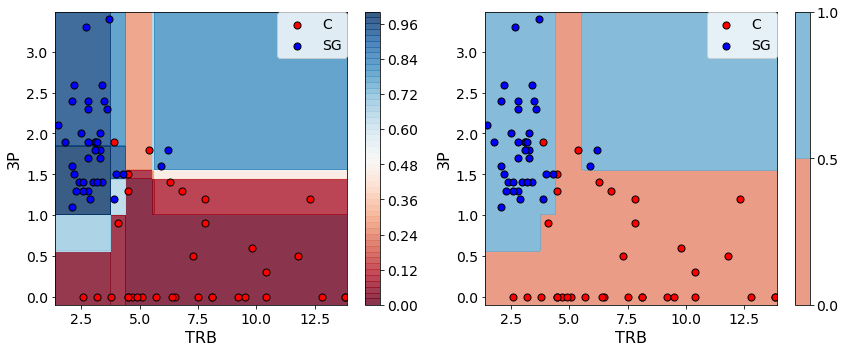

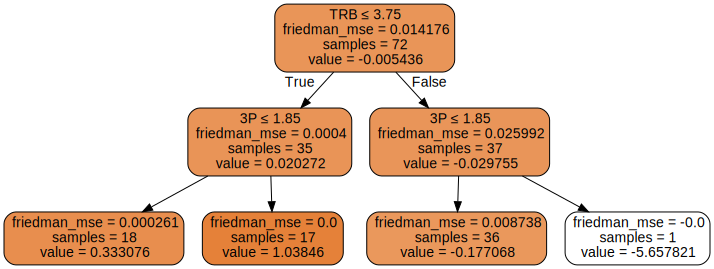

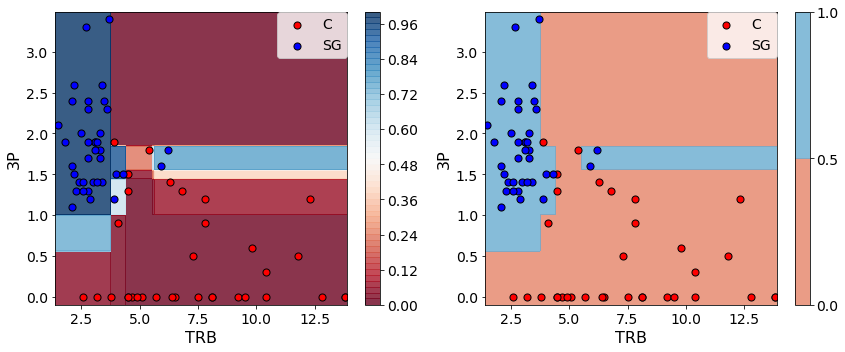

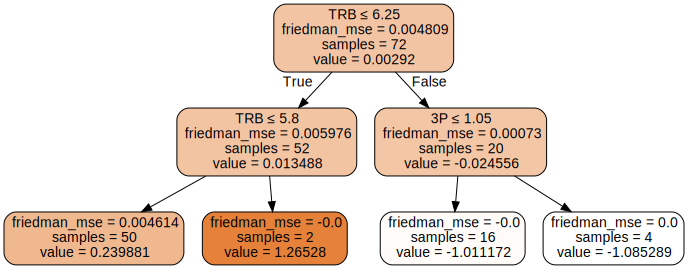

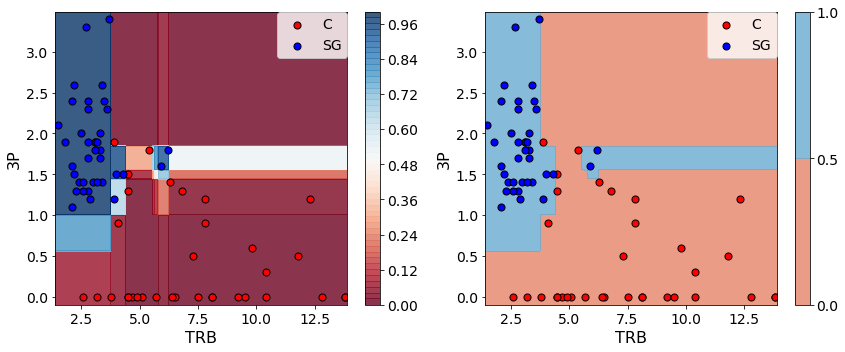

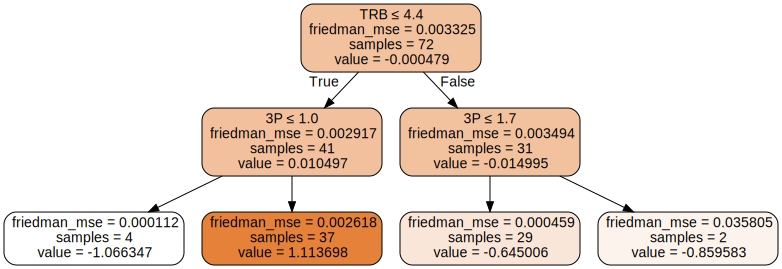

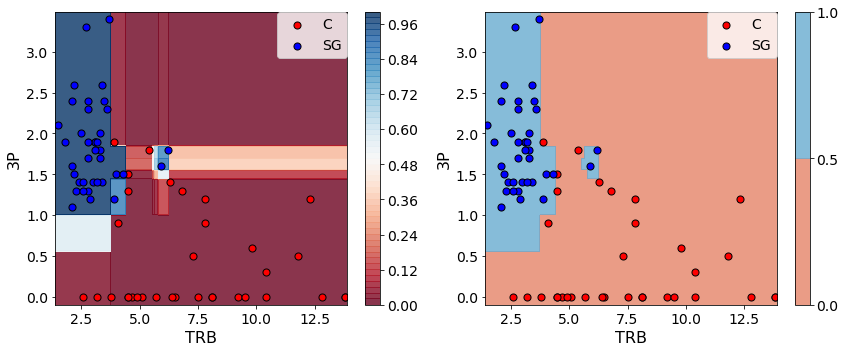

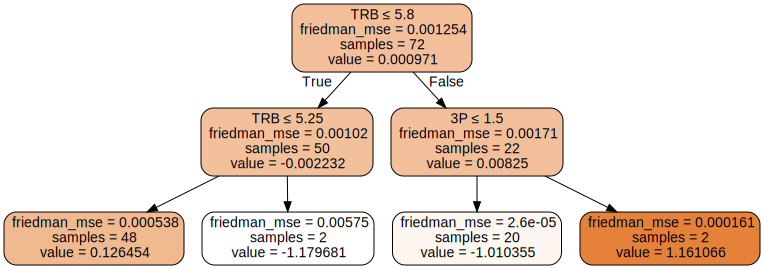

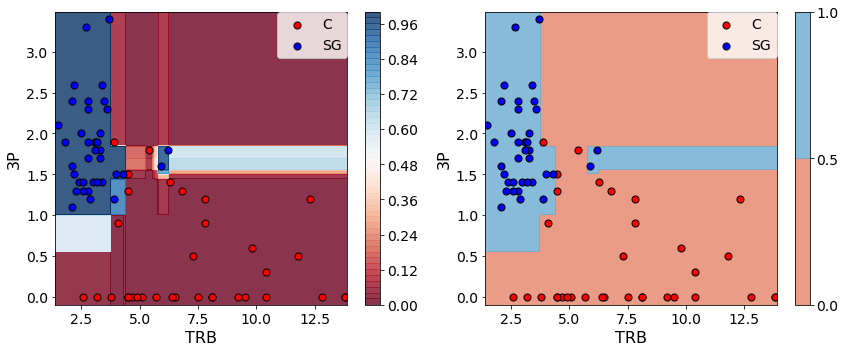

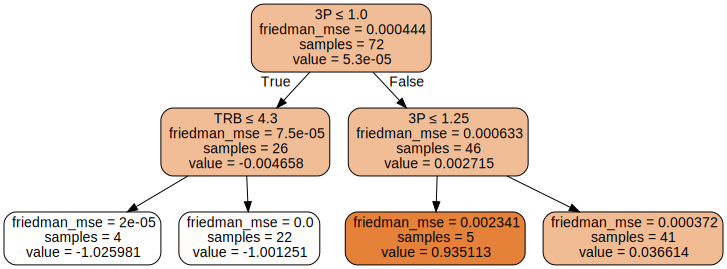

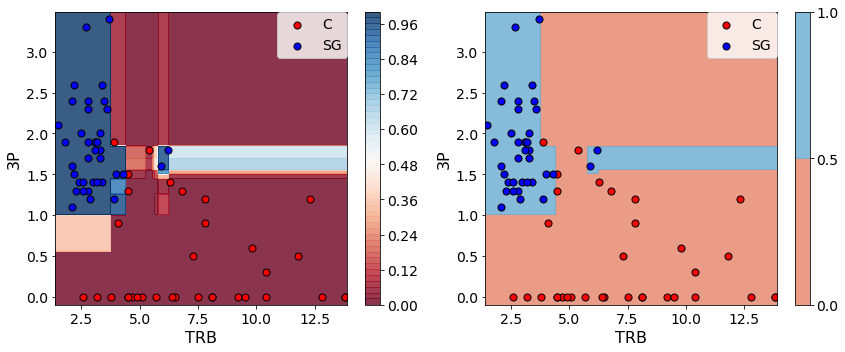

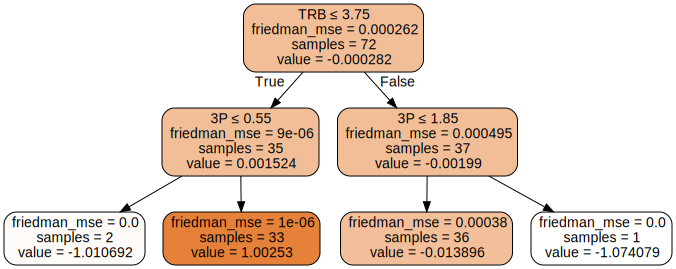

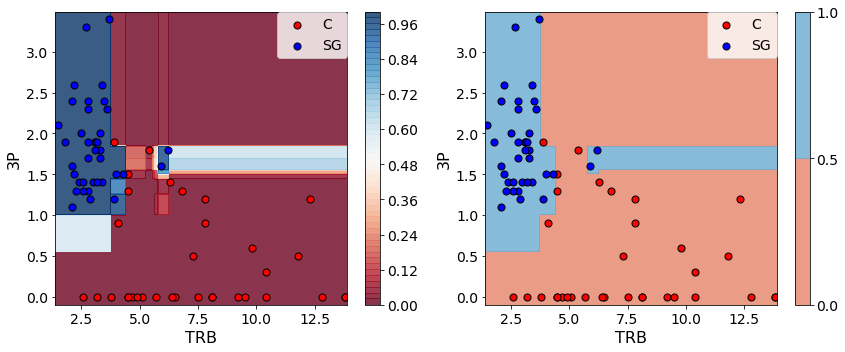

In [334]:
y = y_encoded
yi = y_encoded
predf = 0

for n in range(clf.n_estimators):
    
#     predi = clf.loss_._score_to_proba(clf.estimators_[n][0].predict(x_train))[:,1]
#     predf = predf + clf.learning_rate * predi
    
#     ei = y - predf
#     yi = ei
    
#     loss = math.sqrt(np.sum(ei**2))
#     print("x0   :", [f"{v:.2f}" for v in x_train.iloc[-10:, 0]])
#     print("x1   :", [f"{v:.2f}" for v in x_train.iloc[-10:, 1]])
#     print("y    :", [f"{v:.2f}" for v in y[-10:]])
#     print("predi:", [f"{v:.2f}" for v in predi[-10:]])
#     print("predf:", [f"{v:.2f}" for v in predf[-10:]])
#     print("yi   :", [f"{v:.2f}" for v in yi[-10:]])
#     print(f"loss:{loss:.4f}")
    
    dot_data = tree.export_graphviz(clf.estimators_[n][0], out_file=None, 
                             feature_names=[x_train.columns[0],x_train.columns[1]],  
                             class_names=le.classes_,  
                             filled=True, rounded=True,
                             special_characters=True,
                             precision=6)  

    graph = graphviz.Source(dot_data)  
    display(graph)
    plt.subplots(1,2,figsize=(12, 5))
    plt.subplot(121)
#     plot_decision_boundary(clf.estimators_[n][0], x_train, y_encoded, le=le, score_to_proba=clf.loss_._score_to_proba, levels=[x * 0.02 for x in range(51)])
    plot_decision_boundary(clf, x_train, y_encoded, pos=n, le=le, score_to_proba=clf.loss_._score_to_proba, levels=[x * 0.02 for x in range(51)])
    plt.subplot(122)
#    plot_decision_boundary(clf.estimators_[n][0], x_train, y_encoded, le=le, score_to_proba=clf.loss_._score_to_proba, levels=[-1., -0.5, 0., 0.5, 1.])
    plot_decision_boundary(clf, x_train, y_encoded, pos=n, le=le, score_to_proba=clf.loss_._score_to_proba, levels=[0, 0.5, 1])
    plt.tight_layout()
    plt.show()